# Bike Share in San Francisco Bay Explanatory Data Analsys
## by (Yusuf Olaniyi)

## Investigation Overview


> The analysis is aimed at getting the factors that affects the number of rides in the Month of Febuary, 2019.



## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df_copy = df.copy()
df_copy.dropna(inplace=True)
df_copy['time_of_day'] = df_copy.start_time.str.extract('(\d{2}:\d{2})')
df_copy['day_of_month'] = df_copy.start_time.str.split('-',expand=True)[2].str.split(' ',expand=True)[0].astype('int')
df_copy['hour_of_day'] = df_copy['time_of_day'].str.split(':',expand=True)[0].astype(int)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## What hour(s) of the day are there more rides?

> It can be deduced that there were more rides in the 
morning between 6 am and 10 am and in the evening between 4 pm to 8 pm

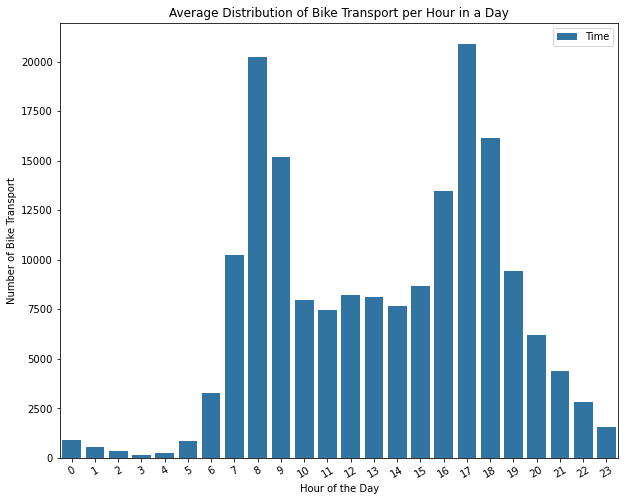

In [4]:
base_color = sb.color_palette()[0]
hour_order = df_copy.hour_of_day.value_counts().sort_index().index
plt.figure(figsize=(10,8))
sb.countplot(data=df_copy,x='hour_of_day',color=base_color,order=hour_order,label='Time');
plt.xticks(rotation=30)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bike Transport')
plt.title('Average Distribution of Bike Transport per Hour in a Day')
plt.legend();

## Distribution of rides per day 

> During the analysis I found out that there were more rides during weekdays when compared to weekend.

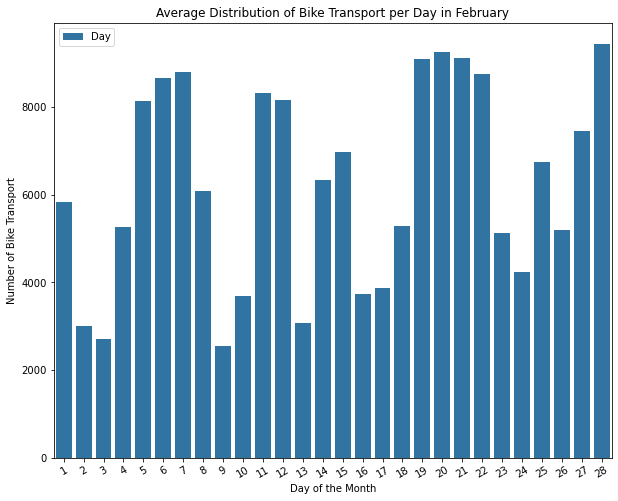

In [5]:
day_index = df_copy.day_of_month.value_counts().sort_index().index

plt.figure(figsize=(10,8))
sb.countplot(data=df_copy,x='day_of_month',color=base_color,order=day_index,label='Day');
plt.xticks(rotation=30)
plt.xlabel('Day of the Month')
plt.ylabel('Number of Bike Transport')
plt.title('Average Distribution of Bike Transport per Day in February')
plt.legend();

## Distribution of ride for each age group

> It was discovered that Youth and Young Adults takes more ride

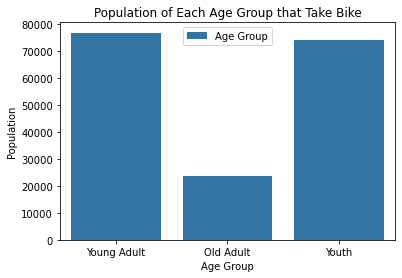

In [6]:
df_copy['Age'] = 2019 - df_copy['member_birth_year']
df_copy.loc[df_copy['Age'] <= 16,'Age_group'] = 'Child'
df_copy.loc[(df_copy['Age'] > 16) & (df_copy['Age'] <= 30),'Age_group'] = 'Youth'
df_copy.loc[(df_copy['Age'] > 30) & (df_copy['Age'] <= 45),'Age_group'] = 'Young Adult'
df_copy.loc[(df_copy['Age'] > 45),'Age_group'] = 'Old Adult'

sb.countplot(data=df_copy,x='Age_group',color=base_color,label='Age Group')
plt.legend()
plt.xlabel('Age Group')
plt.ylabel('Population')
plt.title('Population of Each Age Group that Take Bike');

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

### Conclusion

> There should be provision for more bikes on Weekdays in environment with larger population of Youth and/or Young adults in the morning and evening

In [17]:
!jupyter nbconvert Explanatory_Data_Analysis.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Explanatory_Data_Analysis.ipynb to slides
[NbConvertApp] Writing 644240 bytes to Explanatory_Data_Analysis.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\YUSUF\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\YUSUF\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\YUSUF\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\YUSUF\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\YUSUF\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_file

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 